In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("BillGates_vaksin_2025.csv")

In [3]:
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1894898975561732606,Thu Feb 27 09:02:18 +0000 2025,0,@TedInvestigasi WHO INILAH SUMBER BENCANA. APA...,1895036727015981364,NaN,TedInvestigasi,in,NaN,0,1,1,https://x.com/undefined/status/189503672701598...,183517457,NaN
1,1894558506390548530,Wed Feb 26 01:22:01 +0000 2025,127,Bill Gates seorang Filantropis (dermawan) ? B...,1894558506390548530,https://pbs.twimg.com/ext_tw_video_thumb/18945...,NaN,in,NaN,5,3,67,https://x.com/undefined/status/189455850639054...,1254035776322453506,NaN
2,1893562006642532761,Sun Feb 23 07:22:17 +0000 2025,0,Jangan percaya sama Orang ini..selama akhir za...,1893562006642532761,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/189356200664253...,131720346,NaN
3,1893454686226915754,Sun Feb 23 00:15:50 +0000 2025,0,Ada dan nyata tetapi tidak di akui pemerintah....,1893454686226915754,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/189345468622691...,1455432398892453888,NaN
4,1892593193851433116,Thu Feb 20 15:12:34 +0000 2025,0,Biang kerok pandemi atau vaksin adalah dia apa...,1892593193851433116,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/189259319385143...,1547194062121250816,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,1940587918848041355,Thu Jul 03 01:46:28 +0000 2025,0,Kamar 403 Kuramata (Isa &amp; Akiko &amp; Taku...,1940587918848041355,https://pbs.twimg.com/amplify_video_thumb/1940...,NaN,in,NaN,0,0,0,https://x.com/undefined/status/194058791884804...,1641749268561289216,NaN
1015,1940368448485523919,Wed Jul 02 11:14:23 +0000 2025,16,Kembiskes bangga gelar forum bersama Bill Gate...,1940368448485523919,https://pbs.twimg.com/media/Gu2S0hOX0AEmLXQ.jpg,NaN,in,NaN,2,6,8,https://x.com/undefined/status/194036844848552...,1938574756267323392,NaN
1016,1939852153994321947,Wed Jul 02 08:50:01 +0000 2025,7,@EviDrajat @SmileyNDeLight @ebonXboy @PCReborn...,1940332120700010978,NaN,EviDrajat,in,NaN,0,1,0,https://x.com/undefined/status/194033212070001...,1741650995313295360,NaN
1017,1939877822316913075,Tue Jul 01 05:38:36 +0000 2025,0,@DokterTifa Assalamu'alaikum Dok isunya dia mu...,1939921560569102716,NaN,DokterTifa,in,NaN,0,0,0,https://x.com/undefined/status/193992156056910...,101637903,NaN


In [4]:
df = df [["full_text","created_at"]]

In [5]:
df

,full_text,created_at
0,@TedInvestigasi WHO INILAH SUMBER BENCANA. APA...,Thu Feb 27 09:02:18 +0000 2025
1,Bill Gates seorang Filantropis (dermawan) ? B...,Wed Feb 26 01:22:01 +0000 2025
2,Jangan percaya sama Orang ini..selama akhir za...,Sun Feb 23 07:22:17 +0000 2025
3,Ada dan nyata tetapi tidak di akui pemerintah....,Sun Feb 23 00:15:50 +0000 2025
4,Biang kerok pandemi atau vaksin adalah dia apa...,Thu Feb 20 15:12:34 +0000 2025
...,...,...
1014,Kamar 403 Kuramata (Isa &amp; Akiko &amp; Taku...,Thu Jul 03 01:46:28 +0000 2025
1015,Kembiskes bangga gelar forum bersama Bill Gate...,Wed Jul 02 11:14:23 +0000 2025
1016,@EviDrajat @SmileyNDeLight @ebonXboy @PCReborn...,Wed Jul 02 08:50:01 +0000 2025
1017,@DokterTifa Assalamu'alaikum Dok isunya dia mu...,Tue Jul 01 05:38:36 +0000 2025


## 1. Cleaning Data

In [6]:
df = df.drop_duplicates(subset=['full_text'])

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

,0
full_text,0
created_at,0


In [10]:
df.shape

(1018, 2)

In [11]:
import re

def clean_X_text(text):
    text = str(text).lower()  # ubah ke huruf kecil
    text = re.sub(r'\b([a-zA-Z])\1{2,}\b', ' ', text)  # hapus kata seperti oooo
    text = re.sub(r"@[A-Za-z0-9_]+", "", text)          # hapus mention
    text = re.sub(r"#\w+", "", text)                    # hapus hashtag
    text = re.sub(r'(.)\1{2,}', r'\1', text)  # ubah huruf berulang di kata lain
    text = re.sub(r"RT[\s]+", "", text)                 # hapus retweet
    text = re.sub(r"https?:\/\/\S+|http?:\/\/\S+", "", text)  # hapus URL
    text = re.sub(r"[^a-zA-Z\s]", " ", text)            # hapus angka, simbol, emoji
    text = re.sub(r"\s+", " ", text).strip()            # hapus spasi berlebih
    return text


In [12]:
df["full_text"] = df["full_text"].apply(clean_X_text)

In [13]:
df["full_text"] = df["full_text"].str.lower()

In [14]:
df

,full_text,created_at
0,who inilah sumber bencana apalagi kmren demokr...,Thu Feb 27 09:02:18 +0000 2025
1,bill gates seorang filantropis dermawan big no...,Wed Feb 26 01:22:01 +0000 2025
2,jangan percaya sama orang ini selama akhir zam...,Sun Feb 23 07:22:17 +0000 2025
3,ada dan nyata tetapi tidak di akui pemerintah ...,Sun Feb 23 00:15:50 +0000 2025
4,biang kerok pandemi atau vaksin adalah dia apa...,Thu Feb 20 15:12:34 +0000 2025
...,...,...
1014,kamar kuramata isa amp akiko amp taku memiliki...,Thu Jul 03 01:46:28 +0000 2025
1015,kembiskes bangga gelar forum bersama bill gate...,Wed Jul 02 11:14:23 +0000 2025
1016,woii aku hny takut ketapel ajaib namboru yg sd...,Wed Jul 02 08:50:01 +0000 2025
1017,assalamu alaikum dok isunya dia mulai sakit ab...,Tue Jul 01 05:38:36 +0000 2025


## 2. Preprocessing
### Normalisasi
### Stopword
### Tokenize
### Stemming

In [15]:
# Normalisasi

norm = {
    "yg": "yang",
    "woii" : "woi",
    "aja": "saja",
    "gak": "tidak",
    "ga": "tidak",
    "gk" : "tidak",
    "utk": "untuk",
    "udah": "sudah",
    "org": "orang",
    "kalo": "kalau",
    "ri": "republik indonesia",
    "pak": "bapak",
    "mrna": "moderna",
    "tbc": "tuberkulosis",
    "uji": "pengujian",
    "mau": "ingin",
    "hny": "hanya",
    "dok": "dokter",
    "dr" : "dokter",
    "it": "informasi teknologi",
    "product" : "produk",
    "jgn" : "jangan",
    "kmren" : "kemarin",
    "kmrn" : "kemarin",
    "bbrp" : "beberapa",
    "dll" : "dan lain lain",
    "okt" : "oktober",
    "al" : "kecerdasan buatan",
    "who" : "world health organization",
    "shg" : "hingga",
    "menkes" : "menteri kesehatan",
    "daripd" : "dari pada",
    "cm" : "cuman",
    "km" : "kamu",
    "tdk" : "tidak",
    "technology" : "teknologi",
    "mrk" : "mereka",
    "lbh" : "lebih",
    "bnyk" : "banyak",
    "pny" : "punya",
    "ny" : "nya",
    "dlam" : "dalam",
    "mnjdi" : "menjadi",
    "jt" : "juta",
    "klo" : "kalau",
    "tb" : "tuberkulosis",
    "drpd" : "dari pada",
    "kau" : "kamu",
    "mewek" : "nangis",
    "lg" : "lagi",
    "knp" : "kenapa",
    "ndut" : "gendut",
    "spa" : "siapa",
    "ama" : "sama",
    "kmrn" : "kemarin",
    "indo" : "indoneisa",
    "dg" : "dengan",
    "ndasssmu" : "kepala kamu",
    "sy" : "saya",
    "jg" : "juga",
    "adl" : "adalah",
    "lewt" : "lewat",
    "bpjs" : "badan penyelenggara jaminan sosial",
    "wowo" : "prabowo",
    "kemendiknas" : "kementerian pendidikan nasional",
    "wlpun" : "walaupun",
    "mbg" : "makan bergizi gratis",
    "bg" : "bill gates",
    "pke" : "pakai",
    "ttd" : "tanda tangan",
    "tbcnya" : "tuberkulosis",
    "kpd" : "kepada",
    "skrng" : "sekarang",
    "jdi" : "jadi",
    "pke" : "pakai",
    "udh" : "sudah",
    "kl" : "kalau",
    "afdol" : "afdal",
    "dtg" : "datang",
    "lgs" : "langsung",
    "krn" : "karena",
    "dpt" : "dapat",
    "nggak" : "tidak",
    "awoakwoak" : "hahaha",
    "nnti" : "nanti",
    "wkwk" : "hahaha",
    "wkwkwwk" : "hahaha",
    "jd" : "jadi",
    "bgt" : "sangat",
    "ikn" : "ibu kota negara",
    "dn" : "dan",
    "kt" : "katanya",
    "xixi" : "hahaha",
    "wok" : "prabowo",
    "sm" : "sama",
    "lu" : "kamu",
    "anying" : "anjing",
    "bet" : "sangat",
    "sblmnya" : "sebelumnya",
    "ntr" : "nanti",
    "eninggoy" : "meninggal",
    "lbh" : "lebih",
    "dpr" : "dewan perwakilan rakyat",
    "dpd" : "dewan perwakilan daerah",
    "dprd" : "dewan perwakilan rakyat daerah",
    "tbx" : "tuberkulosis",
    "lgi" : "lagi",
    "wkwk" : "hahaha",
    "kudu" : "harus",
    "dpt" : "dapat",
    "pgn" : "ingin",
    "bpom" : "badan pengawas obat dan makananan",
    "bs" : "bisa",
    "spy" : "supaya",
    "pks" : "partai keadilan sejahtera",
    "adlh" : "adalah",
    "eks" : "mantan",
    "smntr" : "sementara",
    "mo" : "ingin",
    "iy" : "iya",
    "wapres" : "wakil presiden",
    "mpr" : "majelis pemusyawaratan rakyat",
    "loe" : "kamu",
    "sby" : "susilo bambang yudhoyono",
    "byk" : "banyak",
    "dgn" : "dengan",
    "ngga" : "tidak",
    "trs" : "terus",
    "jd" : "jadi",
    "ind" : "indonesia",
    "hrs" : "harus",
    "yt" : "youtube",
    "tsb" : "tersebut",
    "krn" : "karena",
    "sy" : "saya",
    "wkwkwkkwkw" : "hahaha",
    "tp" : "tapi",
    "rkyt" : "rakyat",
    "smpe" : "sampai",
    "lht" : "lihat",
    "wkwkwkwk" : "hahaha",
    "atw" : "atau",
    "nopv" : "novel oral poliomyelitis vaccine",
    "pbb" : "perserikatan bangsa bangsa",
    "astazeneca" : "astrazeneca",
    "hpv" : "human papillomavirus",
    "sdh" : "sudah",
    "rkytnya" : "rakyatnya",
    "rkyt" : "rakyat",
    "sjk" : "sejak",
    "ai" : "kecerdasan buatan",
    "emg" : "memang",
    "wkwkwk" : "hahaha",
    "hehehe" : "hahaha",
    "usa" : "united states of america",
    "us" : "united states of america",
    "copid" : "covid",
    "lgbt" : "lesbian gay biseksual transgender",
    "wkwkwkwkwkwwk" : "hahaha",
    "bhw" : "bahwa",
    "cdc" : "centers for disease control and prevention",
    "indon" : "indonesia",
    "masy" : "masyarakat",
    "sdg" : "sedang",
    "dibritakan" : "diberitakan",
    "dlm" : "dalam",
    "gw" : "saya",
    "sbg" : "sebagai",
    "apbn" : "anggaran pendapatan dan belanja negara",
    "wni" : "warga negara indonesia",
    "rs" : "rumah sakit",
    "tiati" : "hati hati",
    "ruptor" :"koruptor",
    "dy" : "dia",
    "duren" : "durian",
    "amp" : "sampai",
    "bumn" : "badan usaha milik negara",
    "thn" : "tahun",
    "plandemi" : "pandemi",
    "tbca" : "tuberkulosis",
    "indoneis" : "indonesia",
    "ketum" : "ketua umum",
    "jabar" : "jawa barat",
    "kyknya" : "kayaknya",
    "jkt" :"jakarta",
    "gue" : "saya",
    "trus" : "terus",
    "blog" : "bodoh",
    "bacot" : "banyak berbicara",
    "pcv" : "pneumococcal conjugate vaccin",
    "agar" : "supaya",
    "prof" : "profesor",
    "tiap" : "setiap",
    "fda" : "food and drug administration",
    "dki" : "daerah khusus ibukota",
    "bbc" : "british broadcasting corporation",
    "pemprov" : "pemerintah provinsi",
    "kaga" : "tidak",
    "cuan" : "uang",
    "bkn" : "bukan",
    "gmn" : "gimana",
    "blom" : "belum",
    "th" : "tahun",
    "walopun" : "walaupun",
    "tpi" : "tapi",
    "usd" : "united states dollar",
    "bowo" : "prabowo",
    "pd" : "pada",
    "btw" : "by the way",
    "ttg" : "ttg",
    "hiv" : "human immunodeficiency virus",
    "korup" : "korupsi",
    "cvdpv" : "circulating vaccine derived poliovirus",
    "gt" : "gitu",
    "hut" : "hari ulang tahun",
    "pra" : "para",
    "boong" : "bohong",
    "boongan" : "bohongan",
    "fb" : "facebook",
    "ig" : "instagram",
    "ktnya" : "katanya",
    "kena" : "terkena",
    "ledak" : "meledak",
    "min" : "admin",
    "setop" : "stop",
    "wkakkaka" : "hahaha",
    "termul" : "ternak mulyono",
    "kyk" : "kayak",
    "mgkin" : "mungkin",
    "mksud" : "maksud",
    "ttg" : "tentang",
    "nov" :"november",
    "vapp" : "vaccine sssociated paralytic poliomyelitis",
    "trilun":"triliun",
    "cnbc" : "consumer news and business channel",
    "tani" : "petani",
    "unt" : "untuk",
    "indoneisa" : "indonesia",
    "idi" : "ikatan dokter indonesia",
    "pkl" : "pukul",
    "pake" : "pakai",
    "wib" : "waktu indonesia barat"
    }


In [16]:
def normalisasi(text):
    words = text.split()
    return " ".join([norm.get(w, w) for w in words])

df["full_text"] = df["full_text"].apply(normalisasi)


In [17]:
df

,full_text,created_at
0,world health organization inilah sumber bencan...,Thu Feb 27 09:02:18 +0000 2025
1,bill gates seorang filantropis dermawan big no...,Wed Feb 26 01:22:01 +0000 2025
2,jangan percaya sama orang ini selama akhir zam...,Sun Feb 23 07:22:17 +0000 2025
3,ada dan nyata tetapi tidak di akui pemerintah ...,Sun Feb 23 00:15:50 +0000 2025
4,biang kerok pandemi atau vaksin adalah dia apa...,Thu Feb 20 15:12:34 +0000 2025
...,...,...
1014,kamar kuramata isa sampai akiko sampai taku me...,Thu Jul 03 01:46:28 +0000 2025
1015,kembiskes bangga gelar forum bersama bill gate...,Wed Jul 02 11:14:23 +0000 2025
1016,woi aku hanya takut ketapel ajaib namboru yang...,Wed Jul 02 08:50:01 +0000 2025
1017,assalamu alaikum dokter isunya dia mulai sakit...,Tue Jul 01 05:38:36 +0000 2025


In [18]:
def remove_short_words(text):
    # hapus kata dengan panjang 1–2 huruf
    text = re.sub(r'\b\w{1,2}\b', ' ', text)
    text = re.sub(r'\b(?:zlkh|skru|tsm|nge)\b', ' ', text)
    return text

In [19]:
df["full_text"] = df["full_text"].apply(remove_short_words)

In [20]:
df

,full_text,created_at
0,world health organization inilah sumber bencan...,Thu Feb 27 09:02:18 +0000 2025
1,bill gates seorang filantropis dermawan big ...,Wed Feb 26 01:22:01 +0000 2025
2,jangan percaya sama orang ini selama akhir zam...,Sun Feb 23 07:22:17 +0000 2025
3,ada dan nyata tetapi tidak akui pemerintah ...,Sun Feb 23 00:15:50 +0000 2025
4,biang kerok pandemi atau vaksin adalah dia apa...,Thu Feb 20 15:12:34 +0000 2025
...,...,...
1014,kamar kuramata isa sampai akiko sampai taku me...,Thu Jul 03 01:46:28 +0000 2025
1015,kembiskes bangga gelar forum bersama bill gate...,Wed Jul 02 11:14:23 +0000 2025
1016,woi aku hanya takut ketapel ajaib namboru yang...,Wed Jul 02 08:50:01 +0000 2025
1017,assalamu alaikum dokter isunya dia mulai sakit...,Tue Jul 01 05:38:36 +0000 2025


In [21]:
!pip install Sastrawi

In [22]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = "sih", "kok", "woi", "lah", "tuh"

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

df["full_text"] = df["full_text"].apply(lambda x: stopword(x))
df

,full_text,created_at
0,world health organization inilah sumber bencan...,Thu Feb 27 09:02:18 +0000 2025
1,bill gates seorang filantropis dermawan big ...,Wed Feb 26 01:22:01 +0000 2025
2,jangan percaya sama orang selama akhir zaman d...,Sun Feb 23 07:22:17 +0000 2025
3,nyata tidak akui pemerintah negara tingkat...,Sun Feb 23 00:15:50 +0000 2025
4,biang kerok pandemi vaksin dia setuju soal kec...,Thu Feb 20 15:12:34 +0000 2025
...,...,...
1014,kamar kuramata isa akiko taku memiliki suara s...,Thu Jul 03 01:46:28 +0000 2025
1015,kembiskes bangga gelar forum bersama bill gate...,Wed Jul 02 11:14:23 +0000 2025
1016,aku takut ketapel ajaib namboru sedang antri v...,Wed Jul 02 08:50:01 +0000 2025
1017,assalamu alaikum dokter isunya mulai sakit abi...,Tue Jul 01 05:38:36 +0000 2025


In [23]:
tokenized = df["full_text"].apply(lambda x: x.split())
tokenized

,full_text
0,"[world, health, organization, inilah, sumber, ..."
1,"[bill, gates, seorang, filantropis, dermawan, ..."
2,"[jangan, percaya, sama, orang, selama, akhir, ..."
3,"[nyata, tidak, akui, pemerintah, negara, tingk..."
4,"[biang, kerok, pandemi, vaksin, dia, setuju, s..."
...,...
1014,"[kamar, kuramata, isa, akiko, taku, memiliki, ..."
1015,"[kembiskes, bangga, gelar, forum, bersama, bil..."
1016,"[aku, takut, ketapel, ajaib, namboru, sedang, ..."
1017,"[assalamu, alaikum, dokter, isunya, mulai, sak..."


In [24]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

In [25]:
tokenized = tokenized.apply(stemming)

world health organization ini sumber bencana kemarin demokrat genk zuckeberg bill gates habis kasi dana cuma bikin virus jual vaksin
bill gates orang filantropis dermawan big manusia ambisius culas licik tipikal sifat asli orang zionis ingat negara dia sumbang target marketnya informasi teknologi produk vaksin indonesia salah satu target besar
jangan percaya sama orang lama akhir zaman datang banyak ajar sesat bencana peperangan lain orang ken manusia mati pada hidup uang lalu pandemi chip vaksin
nyata tidak aku perintah negara tingkat bodoh atas indonesia sangat mudah perintah budi gunadi sadikin dan bill gates buat tipu tipu abur data celaka akibat vaksin
biang kerok pandemi vaksin dia tuju soal cerdas buat chip tubuh hingga nuklir ada lihat kasus covid vaksin dia yang biaya semua
yang bilang nama graphene oxide kan program bill gates bill gates pernah bilang efek samping vaksin lihat tahun depan sudah lebih tahun hasil ganggu psikologis dulu aku video soal bill gates tapi hapus
okto

In [26]:
df.to_csv("Data_BillGates_vaksin_Final_2025.csv", index = False)

In [27]:
df

,full_text,created_at
0,world health organization inilah sumber bencan...,Thu Feb 27 09:02:18 +0000 2025
1,bill gates seorang filantropis dermawan big ...,Wed Feb 26 01:22:01 +0000 2025
2,jangan percaya sama orang selama akhir zaman d...,Sun Feb 23 07:22:17 +0000 2025
3,nyata tidak akui pemerintah negara tingkat...,Sun Feb 23 00:15:50 +0000 2025
4,biang kerok pandemi vaksin dia setuju soal kec...,Thu Feb 20 15:12:34 +0000 2025
...,...,...
1014,kamar kuramata isa akiko taku memiliki suara s...,Thu Jul 03 01:46:28 +0000 2025
1015,kembiskes bangga gelar forum bersama bill gate...,Wed Jul 02 11:14:23 +0000 2025
1016,aku takut ketapel ajaib namboru sedang antri v...,Wed Jul 02 08:50:01 +0000 2025
1017,assalamu alaikum dokter isunya mulai sakit abi...,Tue Jul 01 05:38:36 +0000 2025


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [29]:
texts = df["full_text"].dropna().astype(str)

In [30]:
def get_top_ngrams(texts, ngram_range=(2,2), top_n=10):
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(texts)
    freqs = X.sum(axis=0)
    data = [(word, freqs[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    sorted_data = sorted(data, key=lambda x: x[1], reverse=True)[:top_n]
    df_ngram = pd.DataFrame(sorted_data, columns=["kata", "frekuensi"])
    return df_ngram


In [31]:
def plot_ngrams_seaborn(df_ngram, title):
    plt.figure(figsize=(10, 6))
    # buat gradasi warna dari biru ke kuning
    colors = sns.color_palette("coolwarm", n_colors=len(df_ngram))
    # urutkan dari frekuensi kecil ke besar agar warna tinggi paling menonjol
    sns.barplot(
        data=df_ngram,
        y="kata",
        x="frekuensi",
        hue="kata",
        palette=colors[::-1]  # warna terbalik: biru → kuning
    )
    plt.title(title, fontsize=14, weight="bold")
    plt.xlabel("Frekuensi", fontsize=12)
    plt.ylabel("N-gram", fontsize=12)
    plt.grid(axis="x", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


In [32]:
def plot_ngrams_seaborn(df_ngram, title):
    plt.figure(figsize=(10, 6))
    # buat gradasi warna dari biru ke kuning
    colors = sns.color_palette("coolwarm", n_colors=len(df_ngram))
    # urutkan dari frekuensi kecil ke besar agar warna tinggi paling menonjol
    sns.barplot(
        data=df_ngram,
        y="kata",
        x="frekuensi",
        hue="kata",
        palette=colors[::-1]  # warna terbalik: biru → kuning
    )
    plt.title(title, fontsize=14, weight="bold")
    plt.xlabel("Frekuensi", fontsize=12)
    plt.ylabel("N-gram", fontsize=12)
    plt.grid(axis="x", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


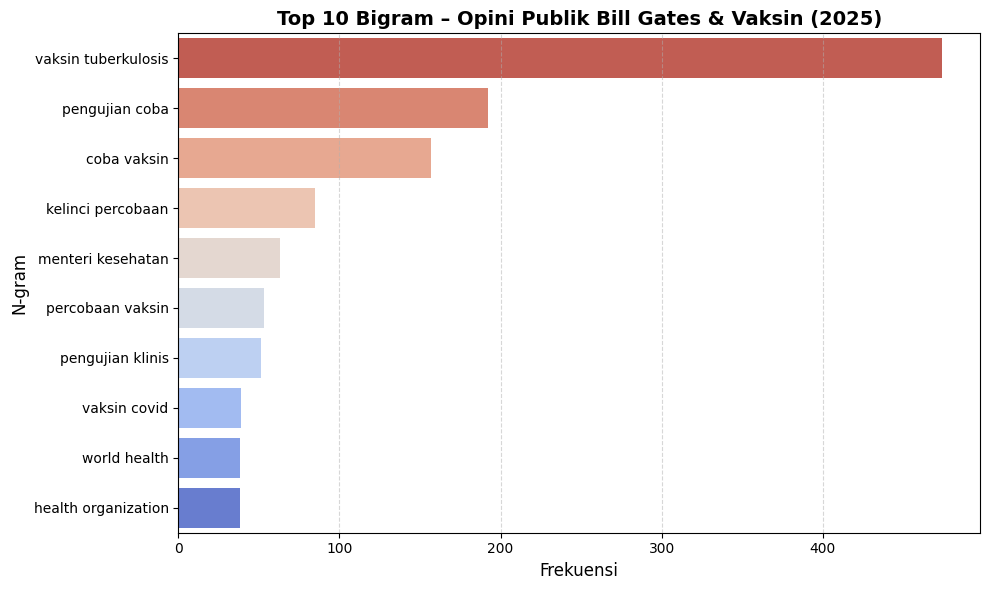

In [33]:
# Bigram
bigram_df = get_top_ngrams(texts, ngram_range=(2,2), top_n=15)
bigram_df = bigram_df[~bigram_df['kata'].str.contains("bill|gates")]
plot_ngrams_seaborn(bigram_df, "Top 10 Bigram – Opini Publik Bill Gates & Vaksin (2025)")


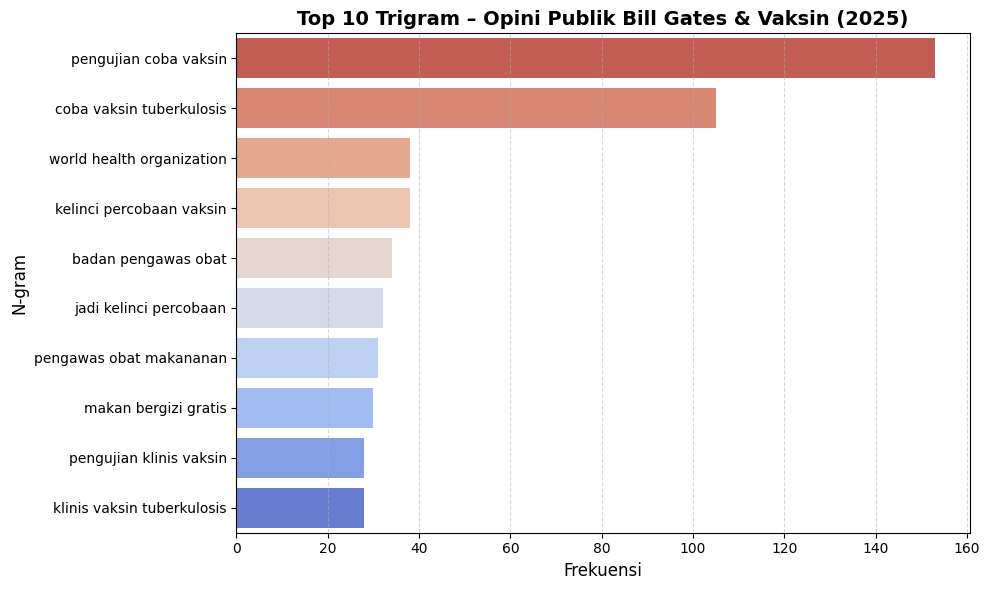

In [34]:
# Trigram
trigram_df = get_top_ngrams(texts, ngram_range=(3,3), top_n=15)
trigram_df = trigram_df[~trigram_df['kata'].str.contains("bill|gates")]
plot_ngrams_seaborn(trigram_df, "Top 10 Trigram – Opini Publik Bill Gates & Vaksin (2025)")

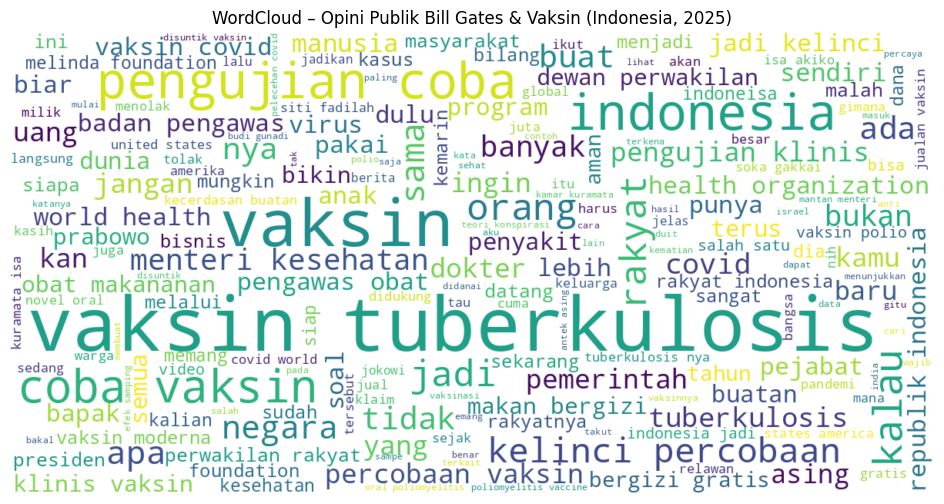

In [35]:
all_text = " ".join(df["full_text"].astype(str).tolist())

# hapus kata 'bill' dan 'gates' (juga variasinya)
all_text = re.sub(r'\b(bill|gates)\b', ' ', all_text, flags=re.IGNORECASE)
all_text = re.sub(r'\s+', ' ', all_text).strip()

# buat wordcloud
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color="white",
    max_words=200,
    colormap="viridis"
).generate(all_text)

# tampilkan
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud – Opini Publik Bill Gates & Vaksin (Indonesia, 2025)")
plt.show()